# Visualization of Gundem Data

We visualize a phylogeny's CNPs with a heatmap, using this function:

In [1]:
import csv
import matplotlib.pyplot as plt

def plot_cnps(filename):
    with open(filename) as f:
        reader = csv.reader(f)
        cnps = [[int(copy_num) for copy_num in row] for row in reader]

    plt.imshow(cnps, aspect="auto", interpolation="nearest")
    plt.show()

## PTX005

PTX005 is the smallest tree in the Gundem dataset, with seven nodes:

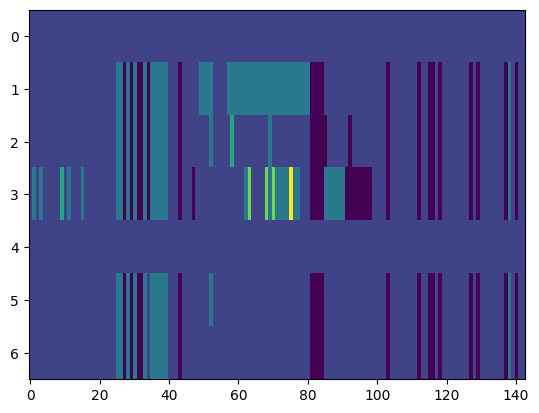

In [20]:
plot_cnps("../data/PTX005.csv")

After 50,000 burn-in iterations and 1,000,000 subsequent samples, the optimized CNPs were slightly different from the original data. Note that cell 0 is the root and cells 1, 2, 3, and 4 are leaves, so only cells 5 and 6 were changed.

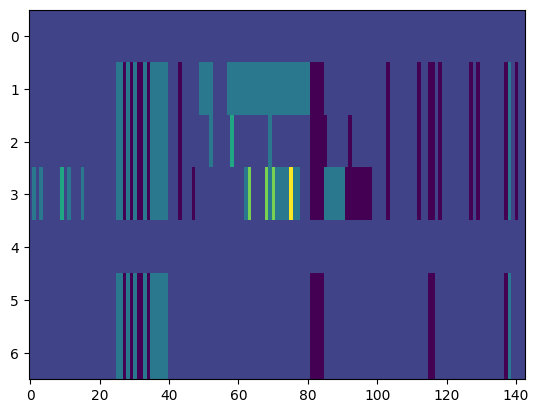

In [21]:
plot_cnps("../data/PTX005_optimized.csv")

The optimization seems to have produced a worse result; it removed the small CNVs. While it is unlikely that these small CNVs would occur, it's even more unlikely that they wouldn't occur in the internal nodes and then have to independently occur in three different children. Hopefully we can tweak some probabilities to fix this.

When we increase the probability of a child matching its parent (from 0.999 to 0.99999), we get the seemingly correct result:

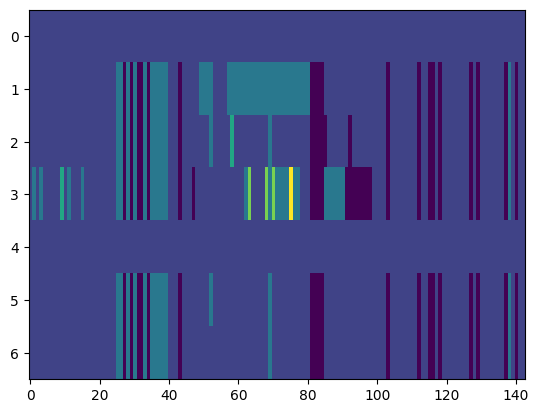

In [3]:
plot_cnps("../data/PTX005_optimized.csv")

## PTX006

PTX006 is the next phylogeny that I tested. On the top is the original data; on the bottom is my optimized version. There are slight differences (I noticed differences on samples 7 and 9), which we need to look into further.

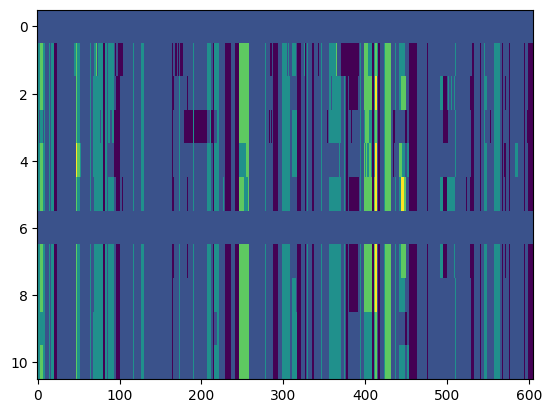

In [3]:
plot_cnps("../data/PTX006/input.csv")

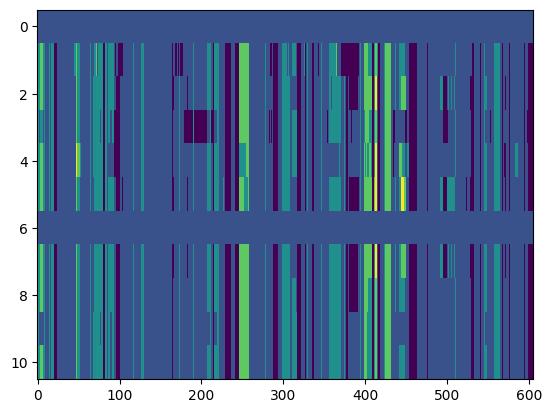

In [4]:
plot_cnps("../data/PTX006/output.csv")